<a href="https://colab.research.google.com/github/sanjal02/Early-Disease-Prediction/blob/main/Team1_UML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Early Disease Prediction**

Section A1 - Team 1

Rebecca Bubis, Sanjal Desai, Yashna Meher, Mishil Trivedi


# Introduction

 1. Why does this matter?

- The increasing prevalence of chronic diseases such as obesity, diabetes, and cardiovascular conditions has created a public health challenge. Left undiagnosed until lates stages leads to higher treatment costs and patient outcomes.Our goal is to leverage machine learning techniques to identify early warning signs in patient data, helping healthcare professionals intervene sooner.


 2. What do we aim do to?

* Cluster based on symptoms


3. What do we want to find out?
* goal: early disease detection/prediction
  - We want to analyze symptom-based medical records by identifying patient clusters that exhibit early-stage disease patterns.






# Data Description

The **National Health and Nutrition Examination Survey (NHANES)** offers comprehensive datasets spanning various health-related domains, including **demographics, dietary habits, questionnaires, laboratory results, and physical examinations**. Each dataset plays a crucial role in health research and population analysis.  

For this project, we created a **consolidated dataset** by integrating multiple NHANES files. The data underwent a **cleaning process**, which involved feature selection and removal of irrelevant or inconsistent attributes. The final dataset comprises **11,933 rows and 220 columns**, incorporating data from the following sources:  

The **Demographic Data** contains essential participant information such as age, gender, race, income, education, and survey weights. This dataset is crucial for adjusting analyses to reflect population estimates. You can explore its variables in the [Demographics Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics).  

The **Dietary Data** provides insights into food and nutrient intake, dietary habits, and overall nutrition levels. It helps researchers analyze dietary patterns and their impact on health outcomes. The variables for dietary data can be found in the [Dietary Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Dietary).  

The **Questionnaire Data** includes a broad range of self-reported information, such as health behaviors, medical history, socioeconomic factors, and mental health status. This dataset is valuable for understanding lifestyle factors and their relationship to health conditions. The full list of variables is available in the [Questionnaire Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire).  

The **Laboratory Data** consists of biomarker measurements from blood and urine samples, including cholesterol levels, glucose levels, and other key health indicators. This dataset is essential for clinical research and biomarker-based health assessments. You can access the laboratory variable details in the [Laboratory Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory).  

Lastly, the **Examination Data** includes results from physical examinations performed by trained health professionals. This dataset covers measurements such as blood pressure, body composition, vision tests, and dental health assessments, making it a key component for studying physical health trends. The variable dictionary for examination data can be found [Examination Variable Dictionary](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination).  


# Analysis Plan

1. Dimensionality Reduction

  1.1 Principal Component Analysis (PCA)

  - PCA was tested to reduce dimensionality while preserving maximum variance.
Retained 90% of the variance, reducing from 85 attributes to a smaller subset.
Outlier removal was performed using reconstruction errors from PCA.

  1.2 CUR Matrix Decomposition (Alternate Approach)

  - CUR was considered as an alternative since it selects actual columns (rather than transforming features into abstract components).
Beneficial for interpretability in medical data.

2. Clustering Analysis

  2.1 KMeans Clustering

 - Used Elbow Method to determine optimal clusters (k=5).
Clustering was performed on the top 5 principal components post-dimension reduction.

  5.2 Cluster Interpretation
Top 5 principal components were analyzed based on attribute loadings.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set the style for matplotlib instead of seaborn
plt.style.use('default')

# Set working directory
print('Current Working Directory:', os.getcwd())  # Prints the current working directory
os.chdir('/content/drive/MyDrive/Unsupervised_ML')
print('New Working Directory:', os.getcwd())

try:
    # Try reading the dataset from the current directory
    df = pd.read_csv('cleaned_data.csv')

    # Basic data verification
    print("Dataset successfully loaded!")
    print("\nDataset Overview:")
    print("-----------------")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")

except FileNotFoundError:
    print("Error: File not found. Please check if the file is in the current directory.")
    print("\nTroubleshooting tips:")
    print("1. Make sure the file is in the same directory as your Python script")
    print("2. Verify the filename matches exactly (including case sensitivity)")
    print("3. Try printing your current working directory:")
    print(f"Current working directory: {os.getcwd()}")
    print("\n4. List files in current directory:")
    print(os.listdir())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current Working Directory: /content/drive/My Drive/Unsupervised_ML
New Working Directory: /content/drive/MyDrive/Unsupervised_ML
Dataset successfully loaded!

Dataset Overview:
-----------------
Number of rows: 11933
Number of columns: 226


In [ ]:
df.head()

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
0,130378.0,R,4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,...,1.57,1.0,57.3,0.0,2.47,0.0,71.0,190.0,200.0,1.0
1,130379.0,R,4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,...,1.57,1.0,58.9,0.0,3.40,0.0,70.0,220.0,220.0,2.0
2,130380.0,R,4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,...,1.57,1.0,37.8,0.0,1.52,0.0,60.0,150.0,165.0,1.0
3,130386.0,R,4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,...,1.57,1.0,95.3,0.0,5.53,0.0,68.0,200.0,180.0,2.0
4,130387.0,R,4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,...,1.57,1.0,25.1,0.0,1.10,0.0,67.0,215.0,215.0,2.0


In [ ]:
cols_to_drop = [col for col in df.columns if col.endswith('_x') or col.endswith('_y')]
df = df.drop(columns=cols_to_drop)
df.shape

(11933, 220)

# EDA

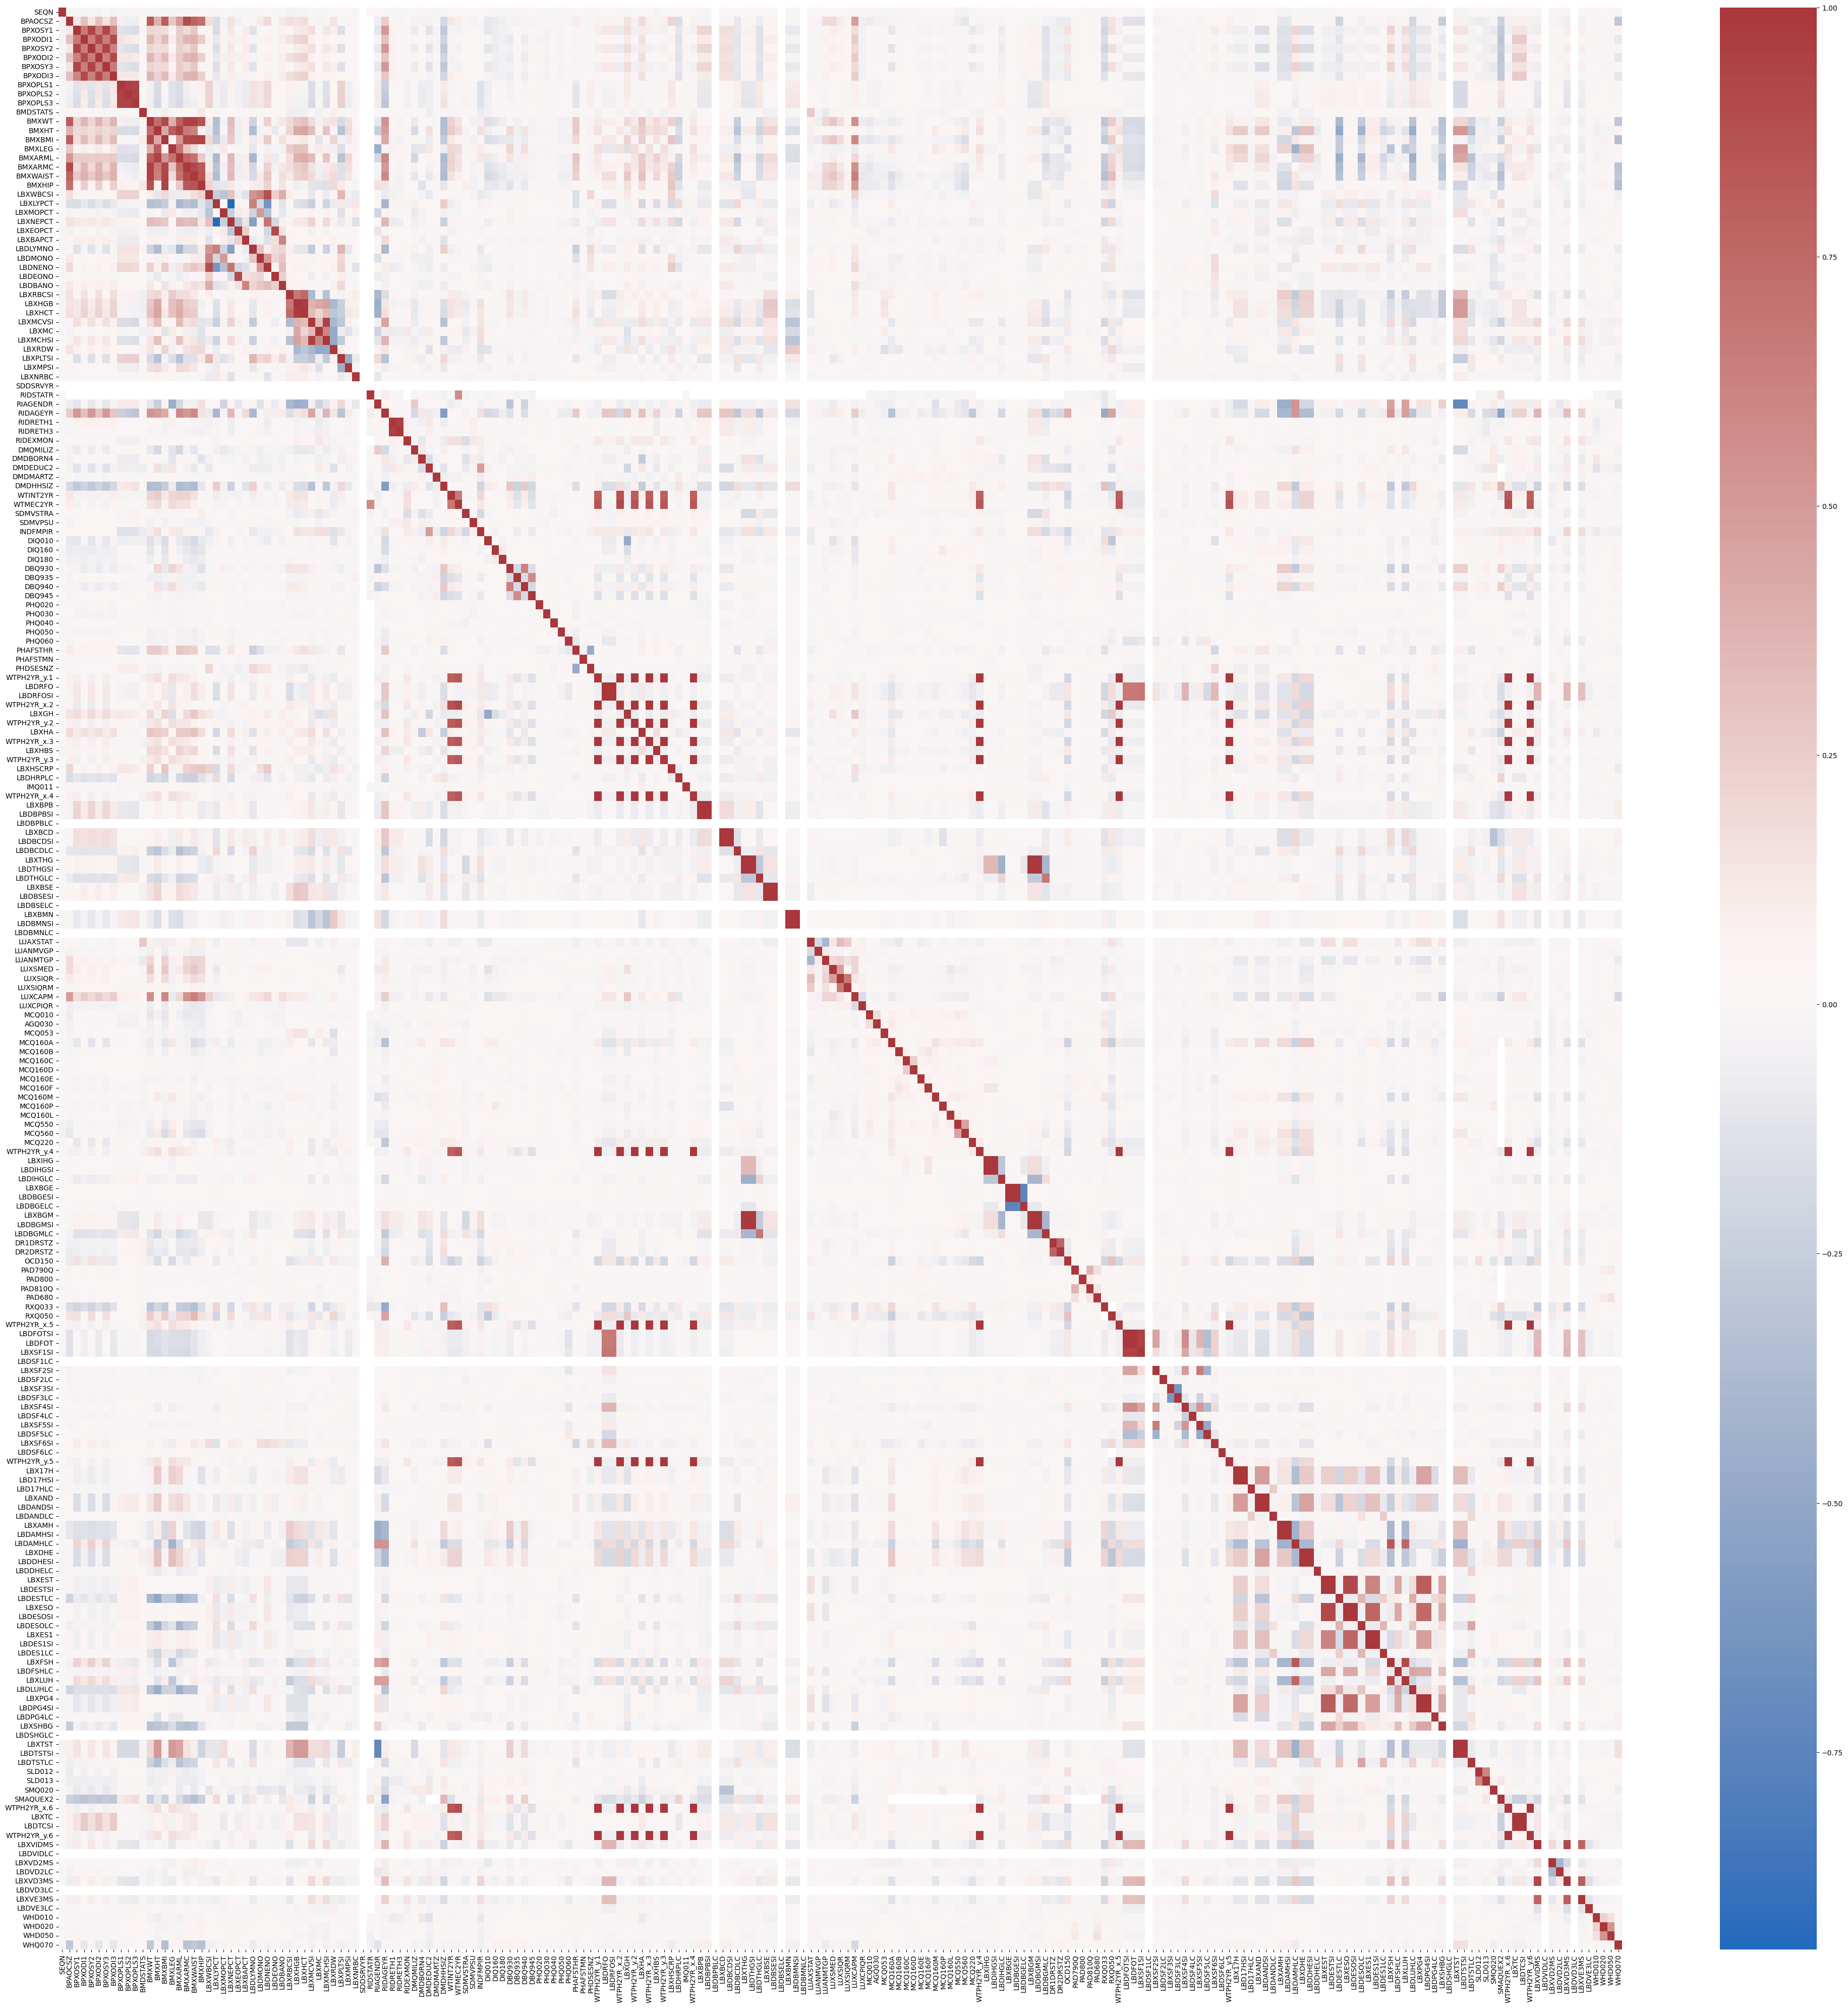

In [ ]:
corr = df.corr( numeric_only=True)
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot=False, cmap="vlag")
plt.show()


In [ ]:
df.describe()

,SEQN,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
count,11933.000000,7611.000000,7517.000000,7517.000000,7505.000000,7505.000000,7480.000000,7480.000000,7517.000000,7505.000000,...,7307.000000,7307.000000,7308.000000,7308.0,7238.000000,7238.000000,8486.000000,8486.000000,8486.000000,8486.000000
mean,136344.000000,3.523190,119.288546,72.748038,119.079680,72.089807,118.917647,71.805882,72.338167,73.087009,...,4.272359,0.801971,73.103339,0.0,4.877314,0.009671,150.146712,317.142588,420.465237,1.548786
std,3444.904716,0.671227,18.561052,11.895572,18.571271,11.848420,18.495220,11.767402,12.715175,12.775995,...,13.545845,0.398542,36.067917,0.0,3.820629,0.097872,906.045672,1120.476550,1491.928102,0.520562
min,130378.000000,2.000000,61.000000,33.000000,59.000000,32.000000,50.000000,24.000000,35.000000,32.000000,...,1.570000,0.000000,4.100000,0.0,0.540000,0.000000,40.000000,63.000000,67.000000,1.000000
25%,133361.000000,3.000000,106.000000,64.000000,106.000000,64.000000,106.000000,64.000000,63.000000,64.000000,...,1.570000,1.000000,48.400000,0.0,2.440000,0.000000,63.000000,145.000000,145.000000,1.000000
50%,136344.000000,4.000000,117.000000,72.000000,116.000000,71.000000,116.000000,71.000000,71.000000,72.000000,...,1.570000,1.000000,68.100000,0.0,3.850000,0.000000,66.000000,174.000000,175.000000,2.000000
75%,139327.000000,4.000000,130.000000,80.000000,129.000000,79.000000,129.000000,79.000000,80.000000,81.000000,...,1.570000,1.000000,91.525000,0.0,6.097500,0.000000,70.000000,207.000000,214.000000,2.000000
max,142310.000000,5.000000,232.000000,142.000000,233.000000,139.000000,232.000000,136.000000,158.000000,141.000000,...,239.000000,1.000000,422.000000,0.0,62.800000,1.000000,9999.000000,9999.000000,9999.000000,9.000000


Due to the size of our dataset, our ability to conduct EDA is limited. Even with the descriptive statistics provided above, it’s challenging to identify any clear relationships or patterns within the data. When examining the heatmap, it becomes apparent that there aren’t many strong correlations between the attributes. However, there are indications of relatively strong correlations in the upper-left and bottom-right corners. Given the lack of significant linearity suggested by the heatmap, Principal Component Analysis may not be the most suitable approach. Nevertheless, we will continue to explore this method while also investigating other nonlinear techniques.

# Data Preprocessing

## Remove Null Values

In [ ]:
# check for null values
df.isna().sum()

,0
SEQN,0
BPAOARM,4279
BPAOCSZ,4322
BPXOSY1,4416
BPXODI1,4416
...,...
LBDVE3LC,4695
WHD010,3447
WHD020,3447
WHD050,3447


In [ ]:
# remove null values
df = df.dropna() # don't want to replace with mean/median since each row is a person
df.isna().sum()

,0
SEQN,0
BPAOARM,0
BPAOCSZ,0
BPXOSY1,0
BPXODI1,0
...,...
LBDVE3LC,0
WHD010,0
WHD020,0
WHD050,0


## Remove Duplicates

In [ ]:
# remove duplicates
df.drop_duplicates
df.shape

(1273, 220)

## Handle Categorical Variables

In [ ]:
# check which columns are categorical
cat_df = df.select_dtypes(include=['object']).columns
cat_df

Index(['BPAOARM', 'LUAPNME', 'PAD790U', 'SLQ300', 'SLQ310', 'SLQ320',
       'SLQ330'],
      dtype='object')

In [ ]:
df_numeric = df.drop(columns=cat_df)
df_numeric.shape  # make separate numeric df, can also encode categorical variables if need to later

(1273, 213)

In [ ]:
# normalize numeric attributes
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
normalized_data = sc.fit_transform(df_numeric)
df_normalized = pd.DataFrame(normalized_data, columns=df_numeric.columns)
df_normalized.head()

,SEQN,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
0,-1.725824,0.613397,0.675412,2.030115,0.464309,1.913257,0.520300,1.794671,0.998074,0.695408,...,-0.210093,0.569791,-0.710177,0.0,-0.771534,-0.093361,-0.027927,-0.030737,-0.058870,-0.872733
1,-1.725433,0.613397,-0.110922,0.734059,-0.332428,0.057509,-0.554196,0.101108,0.148720,0.013262,...,-0.210093,0.569791,-0.665916,0.0,-0.544629,-0.093361,-0.030469,0.034267,-0.032794,0.902010
2,-1.721130,2.310905,-0.560255,0.178606,-0.958436,0.243084,-0.441091,-0.651586,2.102234,2.059699,...,-0.210093,0.569791,-0.610589,0.0,-0.529990,-0.093361,-0.045720,0.157775,12.717176,-0.872733
3,-1.720739,0.613397,-1.009589,-0.284271,-1.072256,-0.128066,-0.780405,-0.369326,2.272104,2.315503,...,-0.210093,0.569791,-0.616122,0.0,-0.581227,-0.093361,-0.033011,0.034267,0.025878,0.902010
4,-1.719957,2.310905,0.900079,1.659814,0.748858,1.449320,0.576852,1.794671,-0.530763,-0.583615,...,-0.210093,0.569791,0.080989,0.0,-0.120098,-0.093361,-0.030469,0.222780,0.097587,-0.872733


# Method 1: Principal Component Analysis
For reference: https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/


Although our initial analysis of the data suggested a lack of linearity, we decided to proceed with PCA to identify which attributes retain the most information. We applied clustering to these attributes in an attempt to identify potential symptoms for early disease detection. We selected KMeans for the clustering algorithm due to its simplicity and effectiveness with large datasets.

In [ ]:
from sklearn.decomposition import PCA

model = PCA()  # create model
model.fit(df_normalized)  # fit data

# transform the data
transformed_data = model.transform(df_normalized)
transformed_data_df = pd.DataFrame(transformed_data)

transformed_data_df.columns = [f"PC{i+1}" for i in range(df_normalized.shape[1])]  # rename columns
transformed_data_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213
0,3.390608,2.872178,-3.207445,-1.238917,-2.589909,1.898932,2.899553,3.320792,-0.375317,-1.430725,...,-8.578717e-16,-4.005552e-16,-4.327379e-16,2.093895e-16,-2.977161e-17,1.522730e-16,-1.161559e-16,2.890218e-17,-8.713572e-18,1.534897e-16
1,0.396854,2.256195,-5.577963,0.285789,-2.114982,4.652516,-3.456654,-2.365185,0.510196,0.223432,...,3.753575e-16,1.954757e-16,-9.779831e-17,-4.261709e-17,4.863731e-18,2.202645e-17,-1.395510e-17,2.031739e-17,-3.262212e-18,1.282147e-16
2,5.109664,5.573749,7.105649,-0.362386,1.286620,-0.732264,-2.609617,-0.438919,-0.368203,2.173982,...,-5.147099e-16,-2.236002e-16,1.693265e-16,1.293463e-16,1.053706e-16,1.817442e-16,-2.613539e-16,1.823571e-17,-1.498160e-17,-2.322447e-16
3,4.457946,2.364702,5.648946,-0.092315,0.378635,-0.976986,-0.349289,-1.357470,1.780657,2.999847,...,-6.887862e-16,6.538783e-16,3.398895e-16,2.264833e-16,-3.140263e-17,-9.766290e-17,9.192086e-17,-2.262297e-17,8.909578e-18,-3.852052e-16
4,3.406494,4.568407,1.985411,-2.566001,-1.101151,0.388745,-2.038360,3.530420,-0.799872,0.392061,...,1.046602e-15,1.484449e-15,8.157895e-16,3.834802e-16,-9.909549e-18,-1.568279e-19,-2.823340e-18,-2.929520e-17,5.537963e-18,-5.131692e-16


In [ ]:
!pip install psynlig

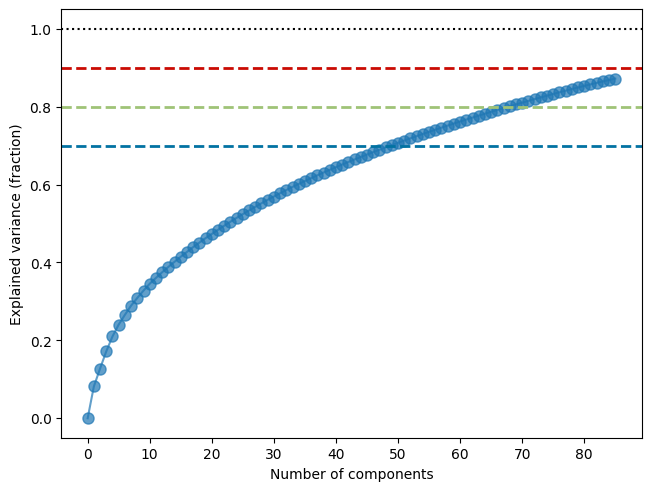

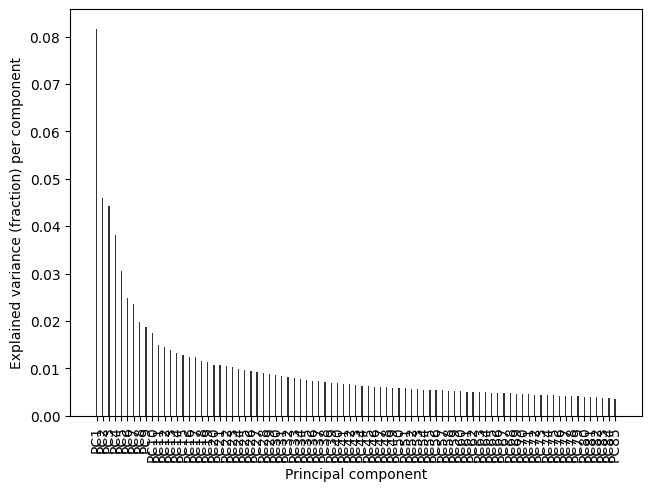

In [ ]:
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(model,  marker='o', markersize=8, alpha=0.70)

# experiment with different threshold values
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=2)  # 90% explained variance
plt.axhline(y=0.8, color='g', linestyle='--', linewidth=2)  # 80% explained variance
plt.axhline(y=0.7, color='b', linestyle='--', linewidth=2)  # 70% explained variance

plt.show()

pca_explained_variance_bar(
    model,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

We wanted to experiment with different thresholds to based on how much of the variance we wanted to have explained by the principal components. We wanted to retain 90% of the information, effectively reducing the number of components to around 85.

In [ ]:
# looking at PCA of those 85 components, based on GitHub dimensionality reduction hands-on
n=85
model = PCA(n)

model.fit(normalized_data)

transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

transformed_data_df.columns = [f"PC{i+1}" for i in range(n)]

transformed_data_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85
0,3.549576,2.819880,-3.286950,-1.056218,-2.835101,0.058191,3.400431,3.566217,-1.114298,-1.039990,...,1.461329,-0.500038,-0.407111,-0.356250,0.004179,0.742751,0.724305,0.699241,-0.159531,-1.513121
1,0.465598,2.032010,-6.025790,0.449703,-2.914490,5.312352,-2.011529,-1.962214,0.633492,-0.119563,...,0.041758,-0.584362,-0.179000,-0.553608,0.388073,-0.490795,-0.068125,-0.452702,0.231204,0.760654
2,4.461752,2.369355,5.672850,-0.213933,0.369935,-0.288920,-0.742712,-1.384038,2.080803,2.975083,...,-0.247386,0.418111,-0.263527,0.301051,0.180386,-1.501514,-1.023353,-0.867075,0.140507,-0.312544
3,3.461124,4.434588,1.871683,-2.647623,-1.170823,0.777851,-1.767012,3.335525,-1.502160,0.798088,...,-0.136263,0.296662,1.140081,-1.164569,-0.161254,-0.605944,0.076410,0.417342,0.233041,-0.043675
4,3.353631,-0.526951,-2.097452,2.489882,3.185832,-0.699200,0.399682,0.470773,1.156656,-0.535422,...,-0.222701,0.308970,0.563522,0.786767,-0.396534,0.673315,0.748681,1.397777,-0.348239,-1.388277


## Outlier Removal

In [ ]:
from sklearn.metrics import mean_squared_error

reconstructed_data = model.inverse_transform(transformed_data_df)

# calculate reconstruction error (mean squared error)
reconstruction_errors = np.sqrt(mean_squared_error(normalized_data.T, reconstructed_data.T, multioutput='raw_values'))

# compute mean and standard deviation of the errors
mean_error = np.mean(reconstruction_errors)
std_error = np.std(reconstruction_errors)

# filter indices within 3 standard deviations
valid_indices = np.where(np.abs(reconstruction_errors - mean_error) <= 3 * std_error)[0]
valid_indices.shape

(1224,)

In [ ]:
# number of outliers
outliers = transformed_data_df.shape[0] - valid_indices.shape[0]
print('The number of outliers is', outliers)

The number of outliers is 19


In [ ]:
# now normalize again after removing outliers to proceed with clustering
sc = StandardScaler()
normalized_data = sc.fit_transform(df_numeric.iloc[valid_indices, :])
normalized_data

array([[-1.71908302,  0.61591335,  0.66911414, ..., -0.03153991,
        -0.02769398, -0.87437777],
       [-1.71869231,  0.61591335, -0.11737179, ...,  0.03270103,
         0.00911091,  0.89573879],
       [-1.7140038 ,  0.61591335, -1.01621286, ...,  0.03270103,
         0.09192193,  0.89573879],
       ...,
       [ 1.71681043,  0.61591335, -0.96003529, ..., -0.0743672 ,
        -0.0939428 , -0.87437777],
       [ 1.72306177,  0.61591335,  0.33204874, ..., -0.04224673,
        -0.05529766,  0.89573879],
       [ 1.72657815, -1.08160393,  0.83764684, ..., -0.03368127,
        -0.04793668, -0.87437777]])

## KMeans Clustering

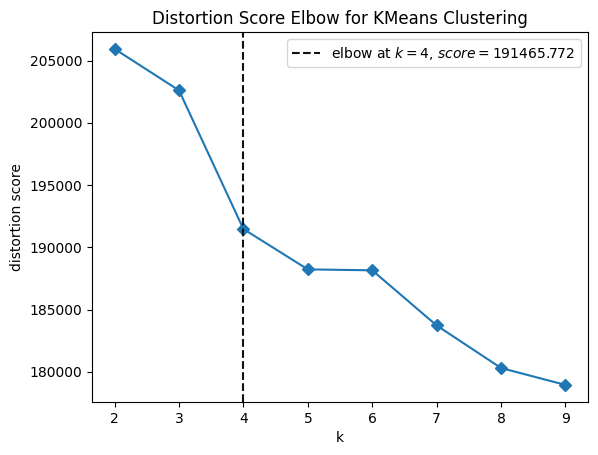

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(transformed_data_df)        # fit the data to the visualizer
visualizer.show()

The elbow method indicates that the optimal number of clusters is k=5, so we will proceed with five clusters. However, after performing PCA, we still have 85 components, which is quite large for quantitative analysis. To improve computational efficiency and ensure better interpretability, we have decided to focus on the top five principal components.

In [ ]:
# need to select top 5 PCs from dimensionality reduction
selected_components = transformed_data_df.iloc[:, :5]

# make sure select indices of those components AFTER outlier removal
valid_transformed_data_selected = selected_components.iloc[valid_indices, :]

# create and fit model
kmeans = KMeans(n_clusters=5, random_state=42) # adjust based on elbow plot, in this case using 5 clusters
kmeans.fit(valid_transformed_data_selected)

# assign labels from clusters
valid_transformed_data_selected['cluster_labels'] = kmeans.labels_

# look at cluster counts
valid_transformed_data_selected['cluster_labels'].value_counts()


<ipython-input-58-7a29472c97ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_transformed_data_selected['cluster_labels'] = kmeans.labels_


,count
cluster_labels,
0,375
3,322
4,220
1,185
2,141


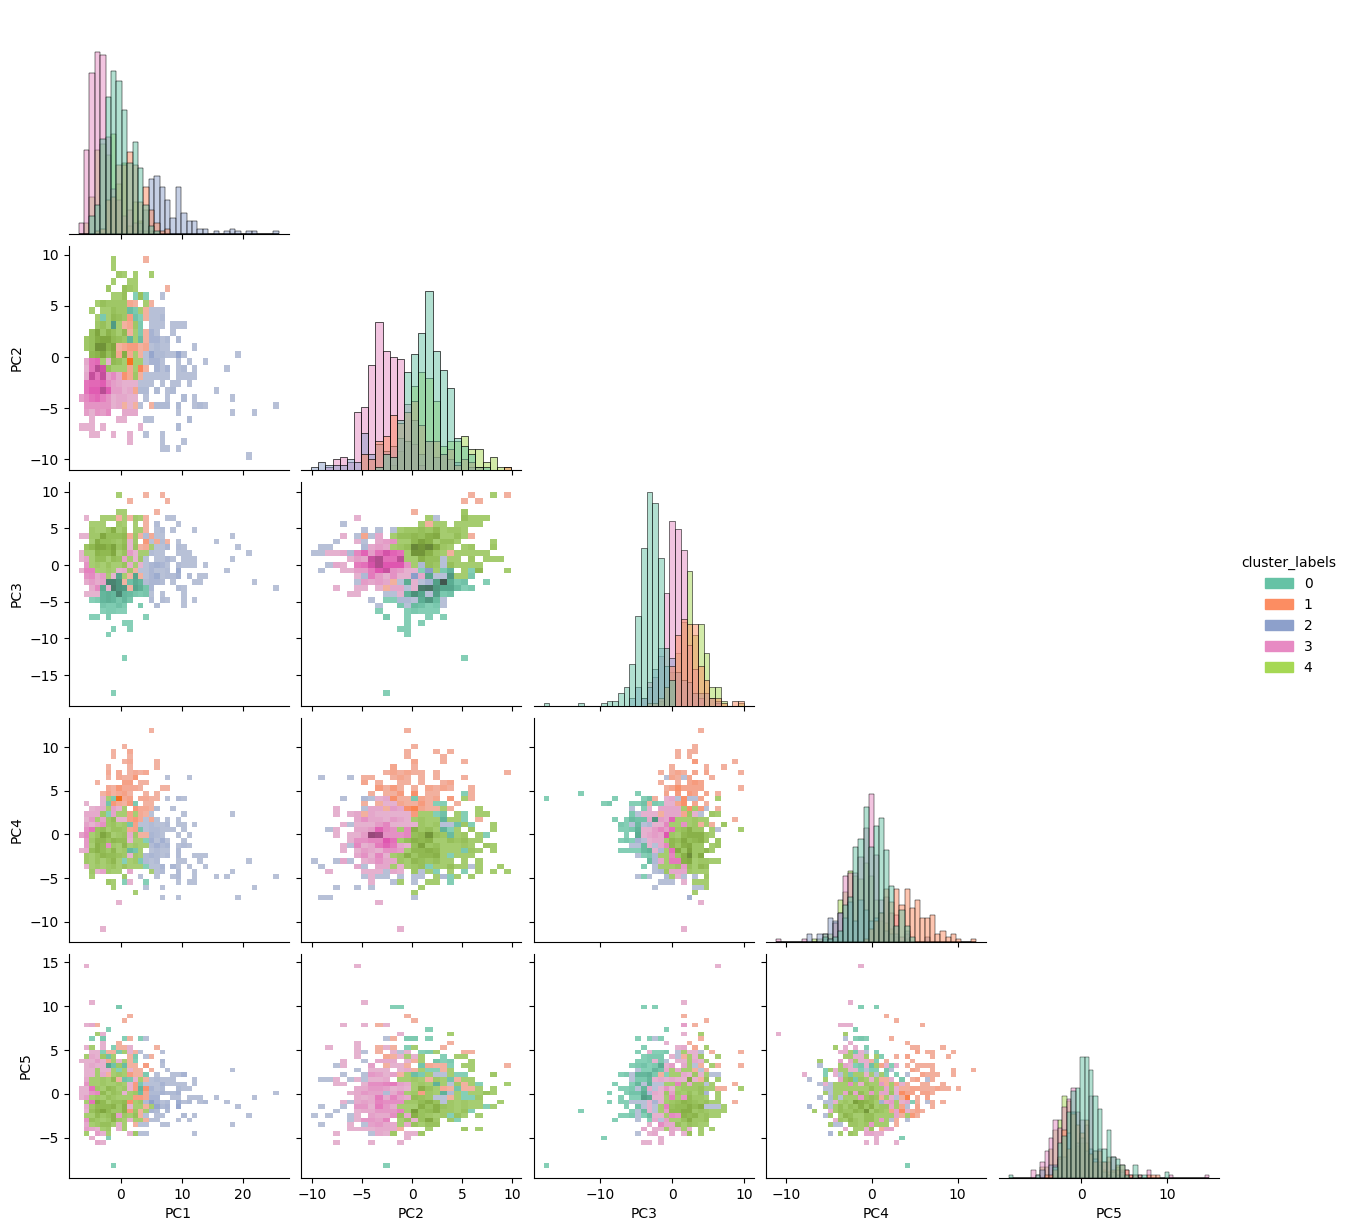

In [ ]:
# plot clusters
sns.pairplot(valid_transformed_data_selected, hue="cluster_labels", kind="hist", corner=True, palette="Set2")

The plots are labeled PC1, PC2, PC3, PC4, and PC5; however, further analysis is needed to interpret these components in more detail. Even with the reduction to five components, we are still working with 85 original attributes (after dimensionality reduction), which makes it challenging to interpret the meaning of these clusters.

In [ ]:
#  shows weight (AKA loading) of each attribute for principal component

components_df = pd.DataFrame(model.components_)
components_df.columns = df_normalized.columns # rename columns
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]  # rename rows
components_df.head()

,SEQN,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
PC1,-0.010403,0.057874,-0.055215,0.009563,-0.054415,0.006004,-0.052038,0.012478,0.037383,0.036491,...,-0.013105,-0.004421,-0.060520,0.0,-0.051585,0.004403,-0.009279,0.001526,0.012468,-0.012352
PC2,0.007145,0.208931,0.064415,0.138054,0.061909,0.138964,0.067058,0.138203,0.049567,0.047760,...,0.010822,0.019834,-0.113359,0.0,-0.080650,0.029045,-0.001293,0.043517,0.026558,-0.049519
PC3,0.010921,0.077264,-0.049007,0.041713,-0.037958,0.049160,-0.040875,0.051093,0.132369,0.135469,...,0.056485,-0.044873,-0.036233,0.0,-0.045992,0.020945,-0.002557,0.012939,0.018544,-0.061834
PC4,0.009394,-0.064063,-0.156949,-0.106240,-0.157931,-0.099851,-0.153916,-0.100110,0.000098,0.003705,...,0.002549,-0.062715,-0.057438,0.0,-0.056895,0.001309,-0.004719,-0.028134,-0.021262,0.018960
PC5,-0.018515,0.016602,-0.048273,-0.055676,-0.051092,-0.065444,-0.046423,-0.065112,0.022715,0.019549,...,-0.020539,0.030506,0.137151,0.0,0.133101,-0.032739,0.011797,0.023403,0.024545,0.055881


In [ ]:
# get name that corresponds to the highest loading for each component in top 5 for easier interpretation
top_loadings_per_component = components_df.idxmax(axis=1)
top_loadings_per_component.head()  # gives components for analysis

,0
PC1,WTPH2YR_y.1
PC2,BMXWT
PC3,RIAGENDR
PC4,LBXEST
PC5,LBDFOT


Component definitions:

* WTPH2YR_y is the Two-Year Examination Weight
* BMXWT  is Body Weight (kg)
* LBXTST is Total Serum Testosterone
* LBDESTSI is Estimated Insulin Sensitivity Index (ISI)
* LBDFOT is Folate (Vitamin B9) Level in Blood

ChatGPT was used to help with cluster interpretation given the team’s lack of domain knowledge. Cluster 0 (blue) consists of individuals with moderate weight, normal testosterone, and moderate insulin sensitivity, suggesting this group may have lower risk of liver disease and stroke. Cluster 1 (orange) looks to be a higher-risk group for stroke characterized by higher weight, lower insulin sensitivity, and lower testosterone. Cluster 2 (purple) likely represents a younger and healthier group with normal insulin, sensitivity, weight, and vitamin B9 levels. Cluster 3 (pink) includes individuals at higher risk for stroke and liver dysfunction shown through low folate, high weight, and insulin resistance. Finally, Cluster 4 (green) appears to be a healthier group with higher folate, improved insulin sensitivity, and moderate weight.